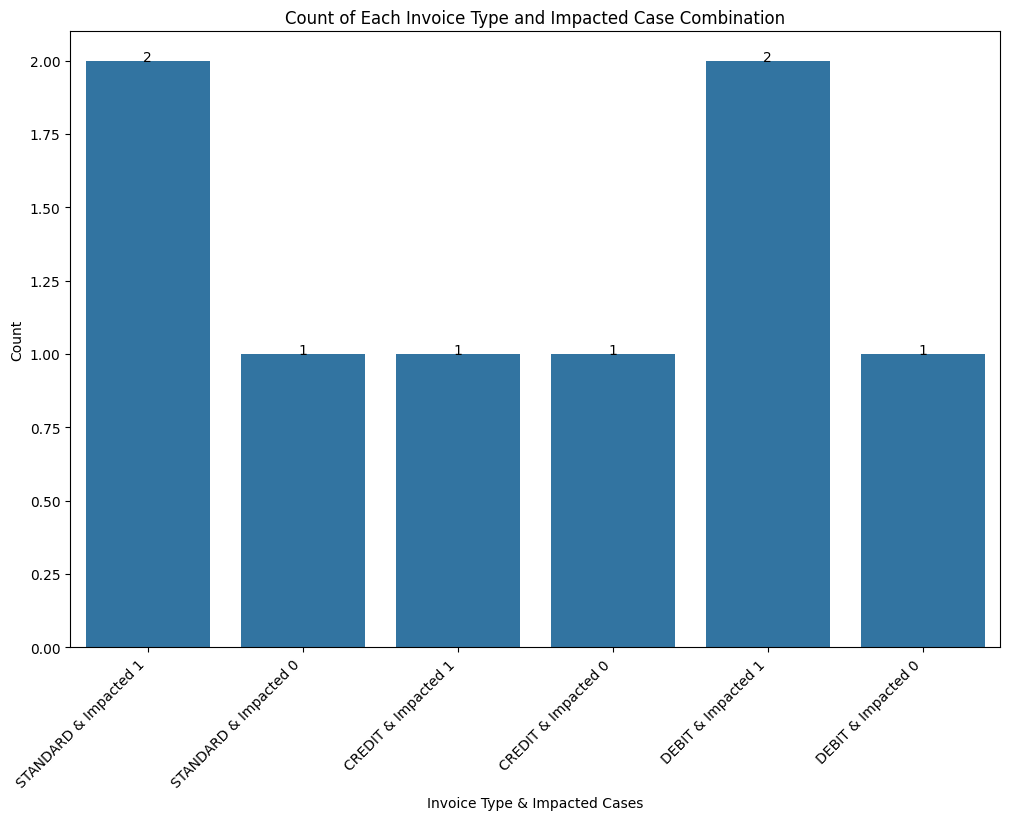

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'INVOICE_TYPE_LOOKUP_CODE': ['STANDARD', 'STANDARD', 'CREDIT', 'CREDIT', 'STANDARD', 'DEBIT', 'DEBIT', 'DEBIT'],
    'Impacted_cases': [1, 0, 1, 0, 1, 1, 0, 1]
}
df = pd.DataFrame(data)

# Get unique values
invoice_types = df['INVOICE_TYPE_LOOKUP_CODE'].unique()
impacted_cases = df['Impacted_cases'].unique()

# Prepare data for plotting
plot_data = []

for invoice_type in invoice_types:
    for case in impacted_cases:
        count = ((df['INVOICE_TYPE_LOOKUP_CODE'] == invoice_type) & (df['Impacted_cases'] == case)).sum()
        plot_data.append({
            'Combination': f'{invoice_type} & Impacted {case}',
            'Count': count
        })

plot_data_df = pd.DataFrame(plot_data)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Combination', y='Count', data=plot_data_df)
plt.title('Count of Each Invoice Type and Impacted Case Combination')
plt.xlabel('Invoice Type & Impacted Cases')
plt.ylabel('Count')

# Annotate the bars with the count values
for index, row in plot_data_df.iterrows():
    ax.text(index, row['Count'], row['Count'], color='black', ha="center")

plt.xticks(rotation=45, ha="right")
plt.show()
